## Chi-Squared Analysis

### First Question: Did more women and children survive compared to men?

Dataset from canvas (`titanic_passenger_list.csv`)

In [8]:
import pandas as pd

passenger_df = pd.read_csv('../data/Titanic_passengers.csv')

passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [9]:
passenger_df.tail(100)

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
1252,"NOEL, Major Gerard Thomas",1856.0,1941.0,55.0,Male,1,died,£3.00,3.0
1253,"DOUTON, Mr William Joseph",1856.0,1912.0,55.0,Male,2,died,£26.00,26.0
1254,"HIPKINS, Mr William Edward",1857.0,1912.0,55.0,Male,1,died,£50.00,50.0
1255,"MOLSON, Mr Harry Markland",1856.0,1912.0,55.0,Male,1,died,£30 10s,30.5
1256,"HAYS, Mr Charles Melville",1856.0,1912.0,55.0,Male,1,died,£93 10s,93.5
...,...,...,...,...,...,...,...,...,...
1347,"FLETCHER, Miss N.",NaN,NaN,NaN,Female,1,died,£1 10s,1.5
1348,"STEVENS, Mr George",NaN,NaN,NaN,Male,1,died,£1 10s,1.5
1349,"CARRUTHERS, Mr Francis",NaN,NaN,NaN,Male,1,died,NaN,NaN
1350,"COLLIS, Mr",NaN,NaN,NaN,Male,1,died,NaN,NaN


- What kind of data is the `dependent` data? (`Survived?`)
  - Nominal

- What kind of data is the `independent` data? (`gender`, `age`)
  - Nominal

Two Types:
  - `Ordinal` data. Data that can be ordered.
  - `Categorical/Nominal` data. Data that can not be ordered.

In [10]:
# margins=True will show the summary
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'], margins=True)
print(contingency_table)

Lived_Died  died  lived   All
Gender                       
Female       143    339   482
Male         709    161   870
All          852    500  1352


<Axes: xlabel='Gender'>

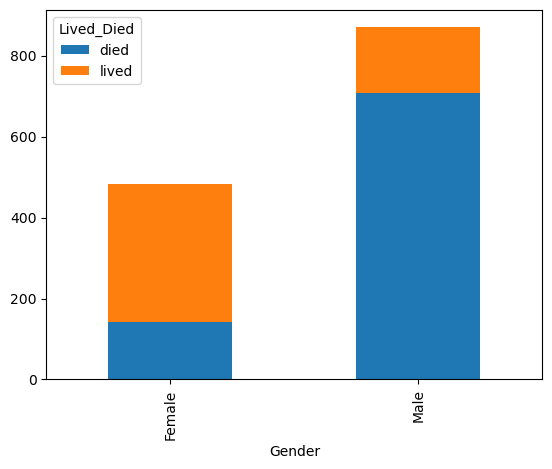

In [11]:
# Task: Create a stacked bar chart showing the number of passengers by gender that lived or died

import matplotlib.pyplot as plt

# Exclude the last column and last row (summary info)
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'])
contingency_table.plot(kind='bar', stacked=True)


In [12]:
from scipy import stats # for chi2_contingency

print(stats.chi2_contingency(contingency_table)[0:3])

# you get 3 values back:
# 1) Chi-Squared: The higher the chi-squared statistic, the less the likelihood that the observed values were the result of pure chance
# 2) Target P-value
# 3) Degrees of freedom: 1 degree of freedom. (rows - 1) * (columns - 1) = 1

(355.24355436145913, 3.0570688722545846e-79, 1)


## Chi-Square: Was Age relevant?

In [17]:
# Check the age column. It is already fixed for the age at the time of the incident.

# Create the bins
# passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins=range(0,90,10))

contingency_table = pd.crosstab(passenger_df['age_bins'], passenger_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats (stat, p-value, dof): {stats.chi2_contingency(contingency_table)[0:3]}')

Lived_Died  died  lived
age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats (stat, p-value, dof): (24.465546982751874, 0.0009433264132943263, 7)


/var/folders/3_/r9bk6mkn009b5z_20lnhypx40000gn/T/ipykernel_26591/2639793924.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)


Text(0.5, 1.0, 'Titanic Survival Rates by Age')

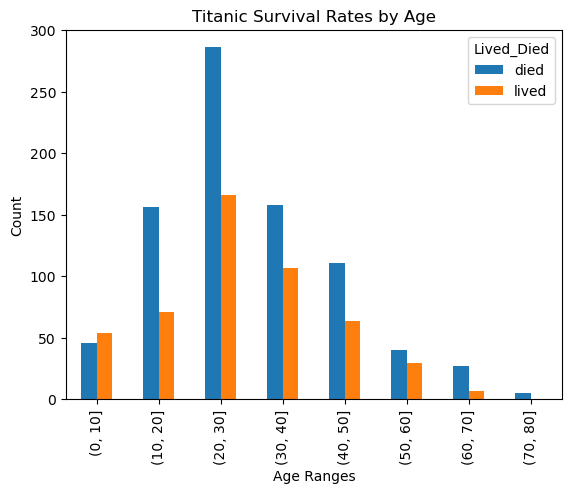

In [20]:
passenger_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.xlabel('Age Ranges')
plt.title('Titanic Survival Rates by Age')

array([<Axes: title={'center': 'died'}>,
       <Axes: title={'center': 'lived'}>], dtype=object)

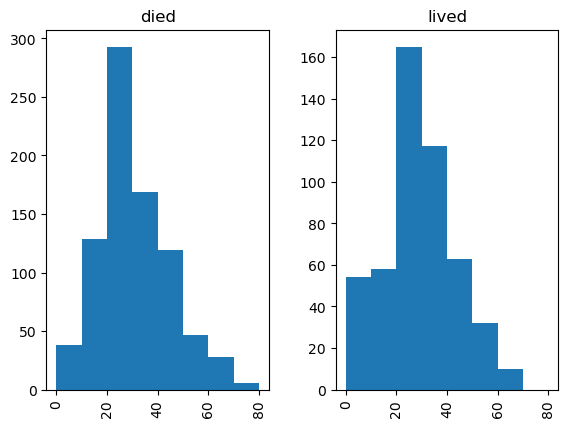

In [14]:
passenger_df.hist(column='Age', bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], by='Lived_Died')

<Axes: ylabel='Frequency'>

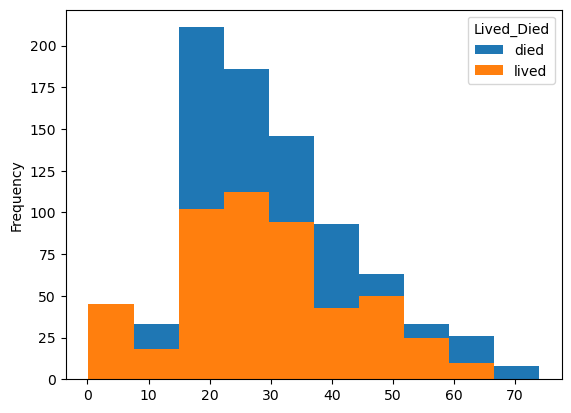

In [18]:
passenger_df.pivot(columns="Lived_Died")["Age"].plot(kind="hist", stacked=True)

/var/folders/3_/r9bk6mkn009b5z_20lnhypx40000gn/T/ipykernel_26591/2763928228.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups'])
/var/folders/3_/r9bk6mkn009b5z_20lnhypx40000gn/T/ipykernel_26591/2763928228.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, '0-9'),
  Text(1.5, 0, '10-19'),
  Text(2.5, 0, '20-29'),
  Text(3.5, 0, '30-39'),
  Text(4.5, 0, '40-49'),
  Text(5.5, 0, '50-59'),
  Text(6.5, 0, '60-69'),
  Text(7.5, 0, '70-79')])

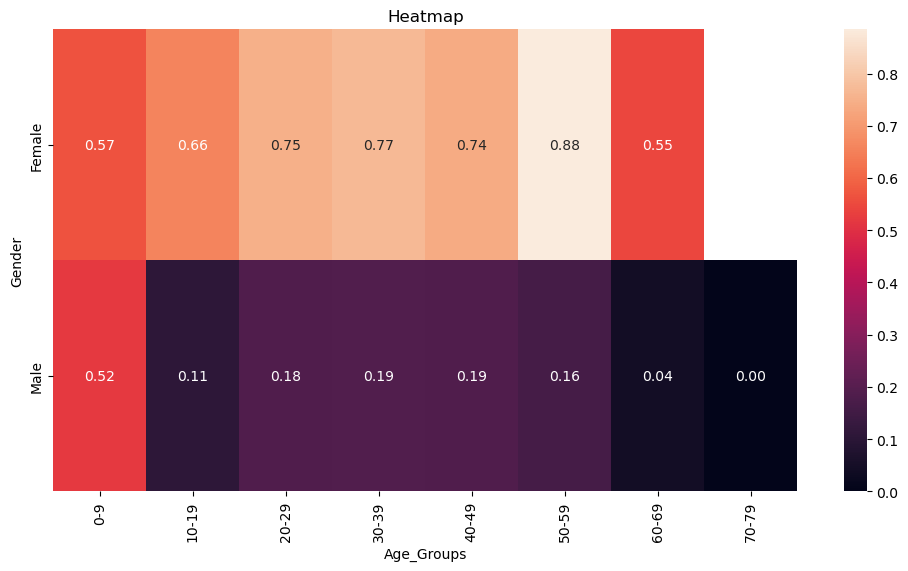

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')
# Drop columns you do not need
passengers_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal', 'Passenger_Class'], axis=1, inplace=True)
# Drop the null values
passengers_df.dropna(inplace=True)
# Encode the categorical data
le = preprocessing.LabelEncoder()
passengers_df['Lived_Died_int'] = le.fit_transform(passengers_df['Lived_Died'])
# Use a pivot table
passengers_df['Age_Groups'] = pd.cut(x=passengers_df['Age'], bins = range(0,90,10))
pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups'])
pivot_table.applymap(lambda x: 1-x)
# Create a figure
plt.figure(figsize=(12,6))
x_axis_labes = ['0-9', '10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labes, fmt='.2f', cmap='rocket')
plt.title('Heatmap')
plt.xticks(rotation=90)
plt.show()


## Task: Did the Titanic Passenger Class Affect Survivorship?

In this case the data is `ordinal` because we can order the categories from first to third

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats

passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')
passengers_df.columns

Index(['Name', 'Born', 'Died', 'Age', 'Gender', 'Passenger_Class',
       'Lived_Died', 'Fare', 'Fare_decimal'],
      dtype='object')

In [32]:
# Create a contingency table
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats (stat, p-value, dof): {stats.chi2_contingency(contingency_table)[0:3]}')

Lived_Died       died  lived
Passenger_Class             
1                 149    201
2                 175    118
3                 528    181
Chi2-Stats (stat, p-value, dof): (104.05195288933228, 2.543346399916496e-23, 2)


Text(0.5, 1.0, 'Titanic Survival Rates by Passenger Class')

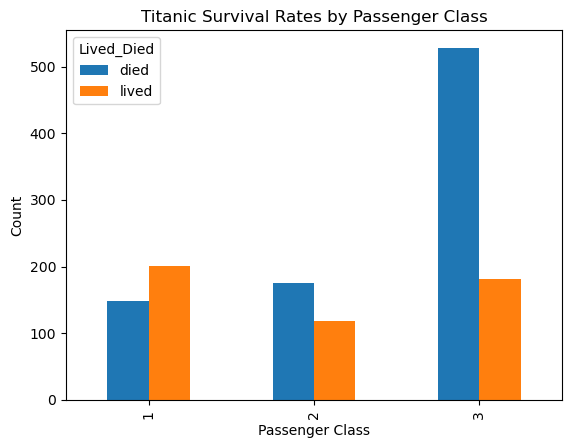

In [38]:
# Create a bar plot with the stacked data
passenger_df.groupby(['Passenger_Class', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.xlabel('Passenger Class')
plt.title('Titanic Survival Rates by Passenger Class')


In [39]:
# Run a chi2_contingency on the table
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats (stat, p-value, dof): {stats.chi2_contingency(contingency_table)[0:3]}')

Lived_Died       died  lived
Passenger_Class             
1                 149    201
2                 175    118
3                 528    181
Chi2-Stats (stat, p-value, dof): (104.05195288933228, 2.543346399916496e-23, 2)


Which passenger class is responsible for the significant difference in survival rate?
- Chi-square test offers that at least `one` of the passenger class is different from what we would expect if the variables were independent
- Since this is our first test, it is considered a `Priori Test`
- To continue our analysis, we will run another test, a `Post Hoc` test

### Post-Hoc Test (Fisher's Exact Test)

- Compare every passenger class to every other class to see if there is statistical significance between the two.
- We could apply a separate Chi-Square test, but our sample data is too small. In this case, `Fisher's Exact`test is a better option.

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats

passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'])
contingency_table

Lived_Died,died,lived
Passenger_Class,,
1,149,201
2,175,118
3,528,181


In [46]:
first_class = contingency_table.iloc[0].values # Extract row values
second_class = contingency_table.iloc[1].values # Extract row values
third_class = contingency_table.iloc[2].values # Extract row values
# Create a Fisher's Exact test to determine if there is a relationship between passenger classes and survival
oddsratio, pvalue = stats.fisher_exact([first_class, second_class])
print(f'Fishers Exact test for First and Second Class: {pvalue}')

oddsratio, pvalue = stats.fisher_exact([first_class, third_class])
print(f'Fishers Exact test for First and Third Class: {pvalue}')

oddsratio, pvalue = stats.fisher_exact([third_class, second_class])
print(f'Fishers Exact test for Second and Third Class: {pvalue}')

Fishers Exact test for First and Second Class: 1.827149276703859e-05
Fishers Exact test for First and Third Class: 7.457205699022123e-24
Fishers Exact test for Second and Third Class: 5.007621820657881e-06


Each of the Fisher's Test reveals statistical significance. 

Another way to conceptualize this result is to look at the p-value as a percent.

| Passenger Class | Died | 
| - | - |
| First Class     |  43% |
| Second Class    |  60% |
| Third Class     |  74% |

TODO: Create a heatmap of Passenger Class split in Age_Range by Gender and survival rate.

### T-Test: Fare and Gender

While the `Chi-Square test` and `Fisher-Test` focus on `categorical` discrete dependent variables, the `T-Test` and `ANOVA` test target `continuous` data. 

### How was Fare (price of passage) affected by Gender and Passenger Class?
- Did one gender pay more than the other?
- Is there a difference in fare between passenger classes?
- Is there and interaction between gender and passenger class on the resulting fare?

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats

passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')



Text(0.5, 1.0, 'Amount of Fare Paid Based on Gender')

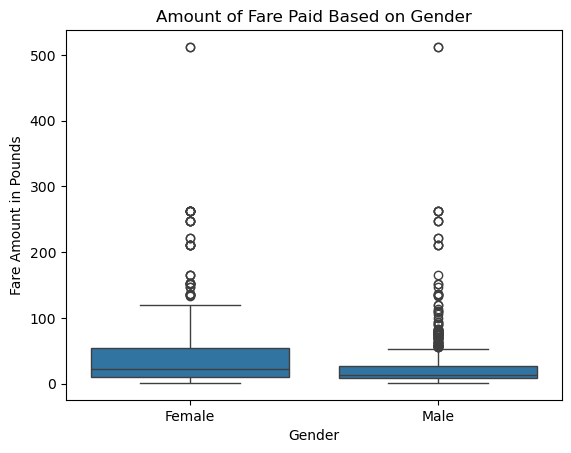

In [49]:
# Visualize the data using a boxplot
sns.boxplot(y = passengers_df['Fare_decimal'], x = passengers_df['Gender'])
plt.ylabel('Fare Amount in Pounds')
plt.title('Amount of Fare Paid Based on Gender')

In [55]:
male = passengers_df[passengers_df['Gender'] == 'Male']
male['Fare_decimal'].describe()

count    839.000000
mean      26.226067
std       42.514485
min        1.000000
25%        7.895000
50%       12.350000
75%       26.550000
max      512.330000
Name: Fare_decimal, dtype: float64

In [56]:
female = passengers_df[passengers_df['Gender'] == 'Female']
female['Fare_decimal'].describe()

count    482.000000
mean      45.118299
std       63.149875
min        1.000000
25%       10.460000
50%       21.555000
75%       54.525000
max      512.330000
Name: Fare_decimal, dtype: float64

In [59]:
from scipy.stats import ttest_ind
# Drop the null values
passengers_df.dropna(inplace=True)
male = passengers_df[passengers_df['Gender'] == 'Male']
female = passengers_df[passengers_df['Gender'] == 'Female']
# Run Test
statistics, pvalue = ttest_ind(male['Fare_decimal'], female['Fare_decimal'])
print(f'T-Test for Fare paid by Gender p-value: {pvalue}')

T-Test for Fare paid by Gender p-value: 6.09336481191187e-13
